# **Practice Project - Classification and Hypothesis Testing: Travel Package Purchase Prediction**

---------------

## **Problem Statement**

### **Context**

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base. A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, it was difficult to identify the potential customers because customers were contacted at random without looking at the available information. 

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. This time company wants to harness the available data of existing and potential customers to target the right customers. 

You as a Data Scientist at "**Visit with us**" travel company has to analyze the customers' data and information to provide recommendations to the Policy Maker and build a model to predict the potential customer who is going to purchase the newly introduced travel package. The model will be built to make predictions before a customer is contacted.
 

### **Objective**

To build a model to predict which customer is potentially going to purchase the newly introduced travel package.


### **Data Description**

1. CustomerID: Unique customer ID
1.  ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
1. Age: Age of customer
1. TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
1. CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3. It's the city the customer lives in. 
1. Occupation: Occupation of customer
1. Gender: Gender of customer
1. NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
1. PreferredPropertyStar: Preferred hotel property rating by customer
1. MaritalStatus: Marital status of customer
1. NumberOfTrips: Average number of trips in a year by customer
1. Passport: The customer has a passport or not (0: No, 1: Yes)
1. OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
1. NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
1. Designation: Designation of the customer in the current organization
1. MonthlyIncome: Gross monthly income of the customer

### Customer interaction data: 

1. PitchSatisfactionScore: Sales pitch satisfaction score
1. ProductPitched: Product pitched by the salesperson
1. NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
1. DurationOfPitch: Duration of the pitch by a salesperson to the customer



## **GitHub Config**

In [ ]:
!git config --global user.name "amrirasyidi"
!git config --global user.email "email"
!git config --global user.password "password"

In [ ]:
token = 'token'
username = 'amrirasyidi'
repo = 'week5_project_mit_idss'

In [ ]:
!git clone https://{token}@github.com/{username}/{repo}

Cloning into 'week5_project_mit_idss'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 8 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), done.


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
%cd {repo}

/content/week5_project_mit_idss


In [ ]:
%ls

Learner_Practice_Project_Tourism_Package_Prediction.ipynb  README.md
LICENSE                                                    Tourism.xlsx


In [ ]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [ ]:
# !git add --all

In [ ]:
## The notebook starts here

## **Importing the libraries required**

In [ ]:
# Importing the basic libraries we will require for the project

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# To get diferent metric scores
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,plot_confusion_matrix,precision_recall_curve,roc_curve,make_scorer

# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

## **Loading the dataset**

In [ ]:
# Loading the dataset - sheet_name parameter is used if there are Basicple tabs in the excel file.
data=pd.read_excel("Tourism.xlsx",sheet_name='Tourism')

## **Overview of the dataset**

### **View the first and last 5 rows of the dataset**

Let's **view the first few rows and last few rows** of the dataset in order to understand its structure a little better.

We will use the head() and tail() methods from Pandas to do this.

In [ ]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [ ]:
data.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


### **Understand the shape of the dataset**

In [ ]:
data.shape

(4888, 20)

* The dataset has 4888 rows and 20 columns. 

### **Check the data types of the columns for the dataset**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

- We can see that 8 columns have less than 4,888 non-null values i.e. columns have missing values.

### **Check the percentage of missing values in each column**

In [ ]:
pd.DataFrame(data={'% of Missing Values':round(data.isna().sum()/data.isna().count()*100,2)}).sort_values(by='% of Missing Values')

,% of Missing Values
CustomerID,0.00
ProdTaken,0.00
OwnCar,0.00
CityTier,0.00
PitchSatisfactionScore,0.00
Occupation,0.00
Gender,0.00
NumberOfPersonVisiting,0.00
Designation,0.00
ProductPitched,0.00


- The `Age` column has 4.62% missing values out of the total observations.
- `TypeofContact` column has 0.51% missing values out of the total observations.
- `DurationOfPitch` column has 5.14% missing values out of the total observations.
- The `NumberOfFollowups` column has 0.92% missing values out of the total observations.
- `PreferredPropertyStar` column has 0.53% missing values out of the total observations.
- `NumberOfTrips` column has 2.86% missing values out of the total observations.
- `NumberOfChildrenVisiting` column has 1.35% missing values out of the total observations.
- The `MonthlyIncome` column has 4.77% missing values out of the total observations.
- We will impute these values after we split the data into train and test sets.

### **Check the number of unique values in each column**

In [ ]:
data.nunique()

CustomerID                  4888
ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64

- We can drop the column - CustomerID as it is unique for each customer and will not add value to the model.
- Most of the variables are categorical except - Age, duration of pitch, monthly income, and number of trips of customers.

**Dropping the unique values column**

In [ ]:
# Dropping CustomerID column
data.drop(columns='CustomerID',inplace=True)

### **Question 1: Check the summary statistics of the dataset and write your observations (2 Marks)**



**Let's check the statistical summary of the data.**

In [ ]:
# Remove _________ and complete the code
data.describe() 

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


**Write your answers here:_____**


### **Check the count of each unique category in each of the categorical variables.** 

In [ ]:
# Making a list of all catrgorical variables 
cat_col=['TypeofContact', 'CityTier','Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation']

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print('-'*50)

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
--------------------------------------------------
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
--------------------------------------------------
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
--------------------------------------------------
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
--------------------------------------------------
3    2402
2    1418
4    1026
1      39
5       3
Name: NumberOfPersonVisiting, dtype: int64
--------------------------------------------------
4.0    2068
3.0    1466
5.0     768
2.0     229
1.0     176
6.0     136
Name: NumberOfFollowups, dtype: int64
--------------------------------------------------
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
------------

- The Free lancer category in the occupation column has just 2 entries out of 4,888 observations.
- We can see that Gender has 3 unique values which include - 'Fe Male' and 'Female'. This must be a data input error, we should replace 'Fe Male' with 'Female'.
- NumberOfPersonVisiting equal to 5 has a count equal to 3 only.
- The majority of the customers are married.
- The majority of the customers own a car.

In [ ]:
# Replacing 'Fe Male' with 'Female'
data.Gender=data.Gender.replace('Fe Male', 'Female')

In [ ]:
# Converting the data type of each categorical variable to 'category'
for column in cat_col:
    data[column]=data[column].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   int64   
 1   Age                       4662 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4637 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   category
 8   NumberOfFollowups         4843 non-null   category
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4862 non-null   category
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4748 non-null   float64 
 13  Passport                  4888 non-null   catego

In [ ]:
df = data.copy()

## **Exploratory Data Analysis**

### **Question 2: Univariate Analysis**

Let's explore these variables in some more depth by observing their distributions.

We will first define a **hist_box() function** that provides both a boxplot and a histogram in the same visual, with which we can perform univariate analysis on the columns of this dataset.

In [ ]:
# Defining the hist_box() function
def hist_box(data,col):
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(12,6))
  # Adding a graph in each part
  sns.boxplot(data[col], ax=ax_box, showmeans=True)
  sns.distplot(data[col], ax=ax_hist)
  plt.show()

#### **Question 2.1:  Plot the histogram and box plot for the variable `Age` using the hist_box function provided and write your insights. (1 Mark)**

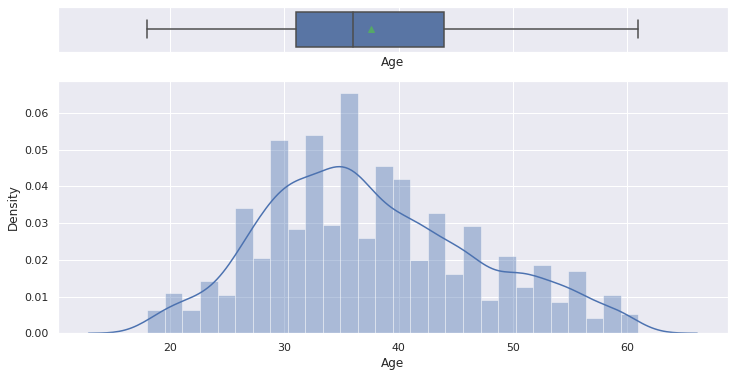

In [ ]:
# Remove _________ and complete the code
hist_box(df, 'Age') 

**Write your answers here:_____**

#### **Question 2.2:  Plot the histogram and box plot for the variable `Duration of Pitch` using the hist_box function provided and write your insights. (1 Mark)**

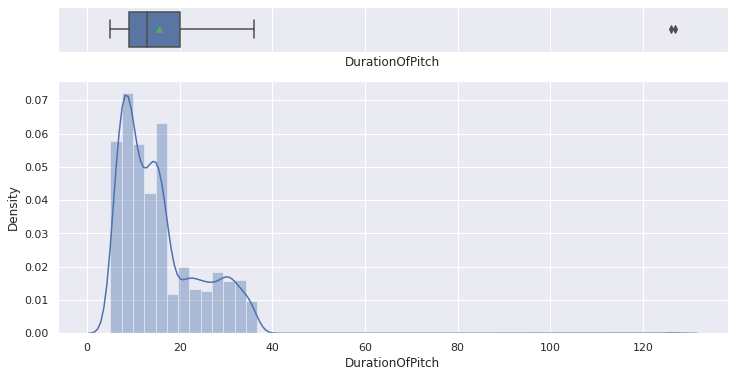

In [ ]:
# Remove _________ and complete the code
hist_box(df, 'DurationOfPitch')

**Write your answers here:_____**

In [ ]:
df[df['DurationOfPitch']>40]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
1434,0,NaN,Company Invited,3,126.0,Salaried,Male,2,3.0,Basic,3.0,Married,3.0,0,1,1,1.0,Executive,18482.0
3878,0,53.0,Company Invited,3,127.0,Salaried,Male,3,4.0,Basic,3.0,Married,4.0,0,1,1,2.0,Executive,22160.0


- We can see that there are just two observations which can be considered as outliers.

**Lets plot the histogram and box plot for the variable `Monthly Income` using the hist_box function**


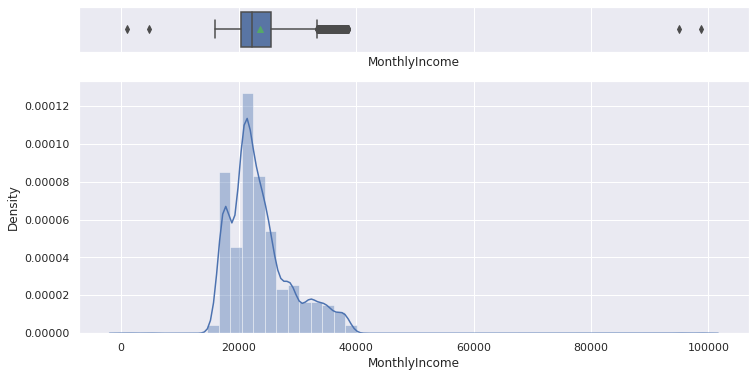

In [ ]:
hist_box(df, 'MonthlyIncome')

- The distribution for monthly income shows that most of the values lie between 20,000 to 40,000.
- Income is one of the important factors to consider while approaching a customer with a certain package. We can explore this further in bivariate analysis. 
- There are some observations on the left and some observations on the right of the boxplot which can be considered as outliers. Let's check how many such extreme values are there. 

In [ ]:
df[
    (df.MonthlyIncome>40000) 
    | (df.MonthlyIncome<12000)
    ]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
38,0,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Basic,NaN,Divorced,1.0,1,2,1,0.0,Executive,95000.0
142,0,38.0,Self Enquiry,1,9.0,Large Business,Female,2,3.0,Deluxe,3.0,Single,4.0,1,5,0,0.0,Manager,1000.0
2482,0,37.0,Self Enquiry,1,12.0,Salaried,Female,3,5.0,Basic,5.0,Divorced,2.0,1,2,1,1.0,Executive,98678.0
2586,0,39.0,Self Enquiry,1,10.0,Large Business,Female,3,4.0,Deluxe,3.0,Single,5.0,1,5,0,1.0,Manager,4678.0


- There are just four such observations which can be considered as outliers.

**Lets plot the histogram and box plot for the variable `Number of Trips` using the hist_box function**


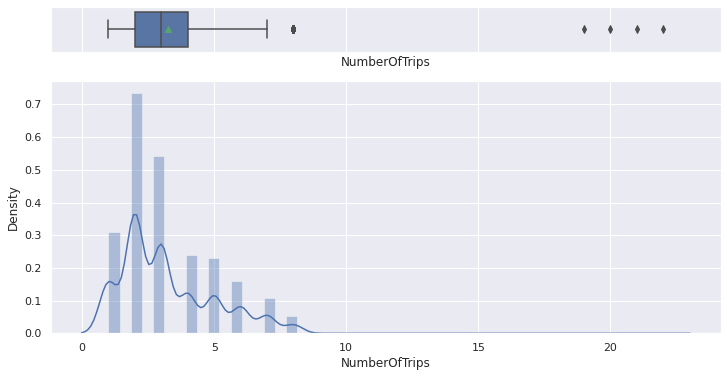

In [ ]:
hist_box(df,'NumberOfTrips')

- The distribution for the number of trips is right-skewed 
- Boxplot shows that the number of trips has some outliers at the right end. Let's check how many such extreme values are there. 

In [ ]:
df.NumberOfTrips.value_counts(normalize=True)

2.0     0.308340
3.0     0.227254
1.0     0.130581
4.0     0.100674
5.0     0.096462
6.0     0.067818
7.0     0.045914
8.0     0.022115
19.0    0.000211
21.0    0.000211
20.0    0.000211
22.0    0.000211
Name: NumberOfTrips, dtype: float64

- We can see that most of the customers i.e. 52% have taken 2 or 3 trips.
- As expected, with the increase in the number of trips the percentage of customers is decreasing.
- The percentage of categories 19 or above is very less. We can consider these values as outliers.
- We can see that there are just four observations with a number of trips 19 or greater

**Removing these outliers form duration of pitch, monthly income, and number of trips.**

In [ ]:
# Dropping observaions with duration of pitch greater than 40. There are just 2 such observations
df.drop(index=df[df.DurationOfPitch>37].index,inplace=True)

# Dropping observation with monthly income less than 12000 or greater than 40000. There are just 4 such observations
df.drop(index=df[(df.MonthlyIncome>40000) | (df.MonthlyIncome<12000)].index,inplace=True)

# Dropping observations with number of trips greater than 8. There are just 4 such observations
df.drop(index=df[df.NumberOfTrips>10].index,inplace=True)

#### **Let's understand the distribution of the categorical variables**

**Number of Person Visiting**

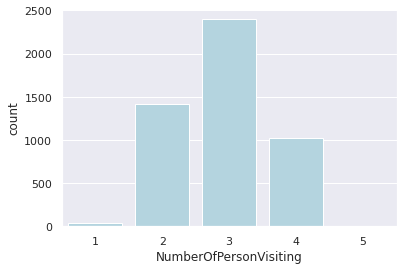

In [ ]:
sns.countplot(df['NumberOfPersonVisiting'], color = 'lightblue')
plt.show()

In [ ]:
df['NumberOfPersonVisiting'].value_counts(normalize=True)

3    0.491390
2    0.289873
4    0.210127
1    0.007995
5    0.000615
Name: NumberOfPersonVisiting, dtype: float64

- Most customers have 3 persons who are visiting with them. This can be because most people like to travel with family.
- As mentioned earlier, there are just 3 observations where the number of persons visiting with the customers are 5 i.e. 0.1%.

**Occupation**

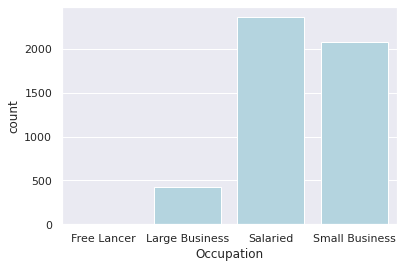

In [ ]:
sns.countplot(df['Occupation'], color = 'lightblue')
plt.show()

In [ ]:
df['Occupation'].value_counts(normalize=True)

Salaried          0.484215
Small Business    0.427224
Large Business    0.088151
Free Lancer       0.000410
Name: Occupation, dtype: float64

- The majority of customers i.e. 91% are either salaried or owns a small business. 
- As mentioned earlier, the freelancer category has only 2 observations.

**City Tier**

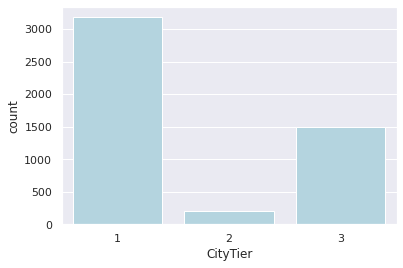

In [ ]:
sns.countplot(df['CityTier'], color = 'lightblue')
plt.show()

In [ ]:
df['CityTier'].value_counts(normalize=True)

1    0.652317
3    0.307093
2    0.040590
Name: CityTier, dtype: float64

- Most of the customers i.e. approx 65% are from tier 1 cities. This can be because of better living standards and exposure as compared to tier 2 and tier 3 cities.
- Surprisingly, tier 3 cities have a much higher count than tier 2 cities. This can be because the company has less marketing in tier 2 cities.

**Gender**

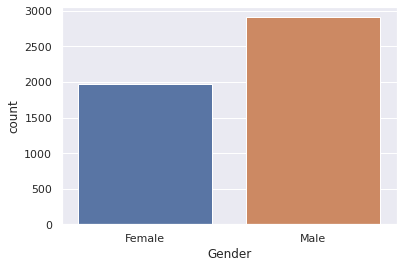

In [ ]:
sns.countplot(df['Gender'])
plt.show()

In [ ]:
df['Gender'].value_counts(normalize=True)

Male      0.596556
Female    0.403444
Name: Gender, dtype: float64

- Male customers are more than the number of female customers
- There are approx 60% male customers as compared to 40% female customers
- This might be because males do the booking/inquiry when traveling with females which imply that males are the direct customers of the company.

**Number of Follow ups**

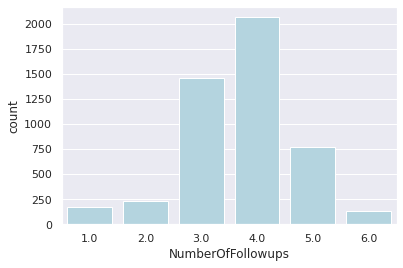

In [ ]:
sns.countplot(df['NumberOfFollowups'], color = 'lightblue')
plt.show()

In [ ]:
df['NumberOfFollowups'].value_counts(normalize=True)

4.0    0.426857
3.0    0.302504
5.0    0.158701
2.0    0.047383
1.0    0.036416
6.0    0.028140
Name: NumberOfFollowups, dtype: float64

- We can see that company usually follow-ups with 3 or 4 times with their customers
- We can explore this further and observe which number of follow-ups have more customers who buy the product.

**Product Pitched**

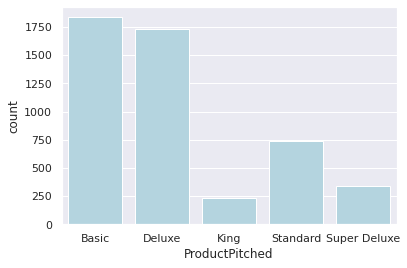

In [ ]:
sns.countplot(df['ProductPitched'], color = 'lightblue')
plt.show()

In [ ]:
df['ProductPitched'].value_counts(normalize=True)

Basic           0.376384
Deluxe          0.354244
Standard        0.152112
Super Deluxe    0.070111
King            0.047150
Name: ProductPitched, dtype: float64

- The company pitches Deluxe or Basic packages to their customers more than the other packages. 
- This might be because the company makes more profit from Deluxe or Basic packages or these packages are less expensive, so preferred by the majority of the customers.

**Type of Contact**

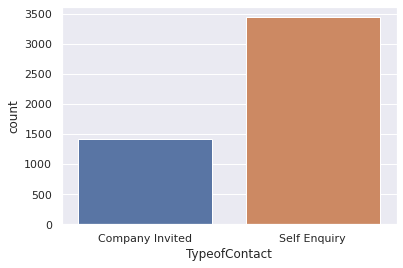

In [ ]:
sns.countplot(df['TypeofContact'])
plt.show()

In [ ]:
df['TypeofContact'].value_counts(normalize=True)

Self Enquiry       0.70884
Company Invited    0.29116
Name: TypeofContact, dtype: float64

- There are approx 70% of customers who reached out to the company first i.e. self-inquiry. 
- This shows the positive outreach of the company as most of the inquires are initiated from the customer's end.

**Designation**

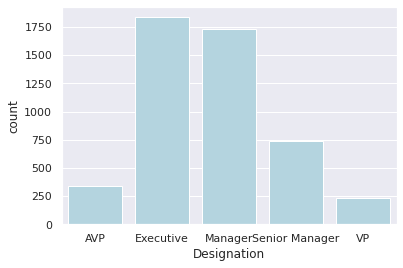

In [ ]:
sns.countplot(df['Designation'], color = 'lightblue')
plt.show()

In [ ]:
df['Designation'].value_counts(normalize=True)

Executive         0.376384
Manager           0.354244
Senior Manager    0.152112
AVP               0.070111
VP                0.047150
Name: Designation, dtype: float64

- Approx 73% of the customers are at the executive or manager level.
- We can see that the higher the position, the lesser number of observations which makes sense as executives/managers are more common than AVP/VP. 

**Product Taken**

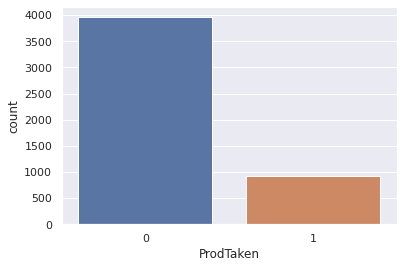

In [ ]:
sns.countplot(df['ProdTaken'])
plt.show()

In [ ]:
df['ProdTaken'].value_counts(normalize=True)

0    0.811808
1    0.188192
Name: ProdTaken, dtype: float64

- This plot shows the distribution of both classes in the target variable is `imbalanced`.
- We only have approx 19% of customers who have purchased the product.

### **Question 3: Bivariate Analysis**

#### **Question 3.1: Find and visualize the correlation matrix using a heatmap and write your observations from the plot. (2 Marks)**



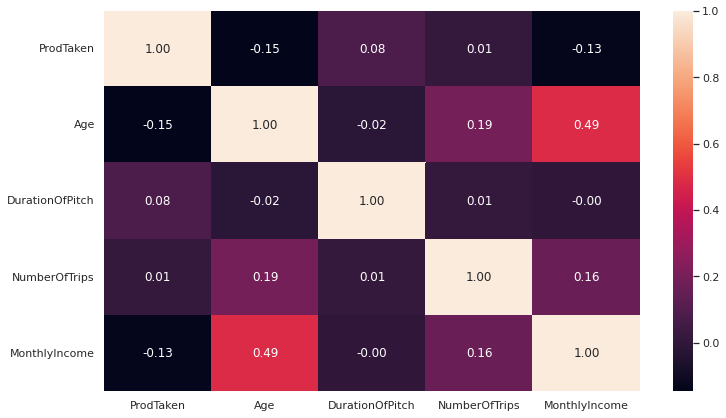

In [ ]:
# Remove _________ and complete the code
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(), annot = True, fmt=".2f")
plt.show()

**Write your answers here:_____**


We will define a **stacked barplot()** function to help analyse how the target variable varies across predictor categories.

In [ ]:
# Defining the stacked_barplot() function
def stacked_barplot(data,predictor,target="ProdTaken",figsize=(10,6)):
  (pd.crosstab(data[predictor],data[target],normalize='index')*100).plot(kind='bar',figsize=figsize,stacked=True, color = ['#bf4767','lightblue'])
  plt.legend(loc="lower right")
  plt.ylabel('Percentage Cancellations %')

In [ ]:
df.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

#### **Question 3.2: Plot the stacked barplot for the variable `Marital Status` against the target variable `ProdTaken` using the stacked_barplot  function provided and write your insights. (1 Mark)**

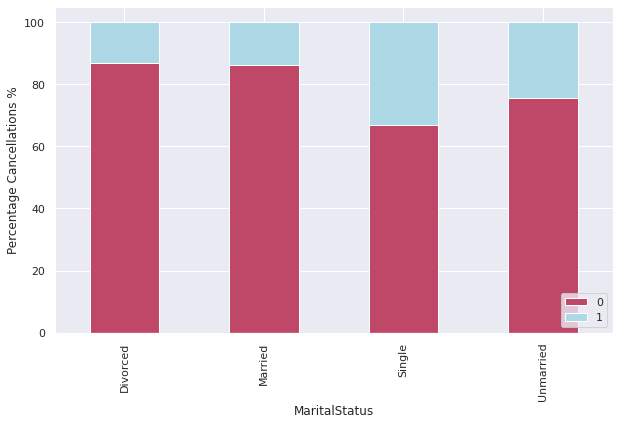

In [ ]:
# Remove _________ and complete the code
stacked_barplot(df, 'MaritalStatus')

**Write your answers here:_____**


#### **Question 3.3: Plot the stacked barplot for the variable `ProductPitched` against the target variable `ProdTaken` using the stacked_barplot  function provided and write your insights. (1 Mark)**

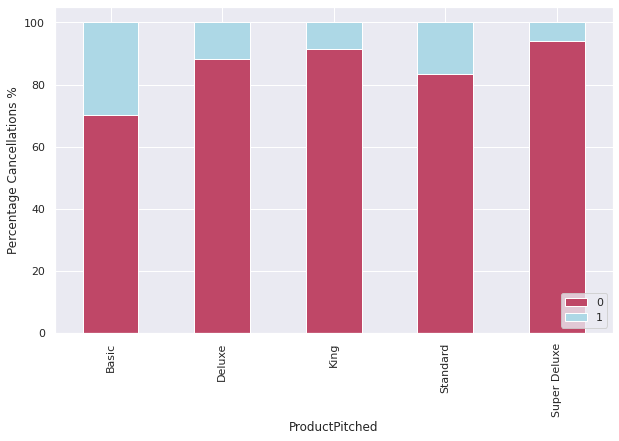

In [ ]:
# Remove _________ and complete the code
stacked_barplot(df, 'ProductPitched')

**Write your answers here:_____**


**Let's plot the stacked barplot for the variable `Passport` against the target variable `ProdTaken` using the stacked_barplot function.**

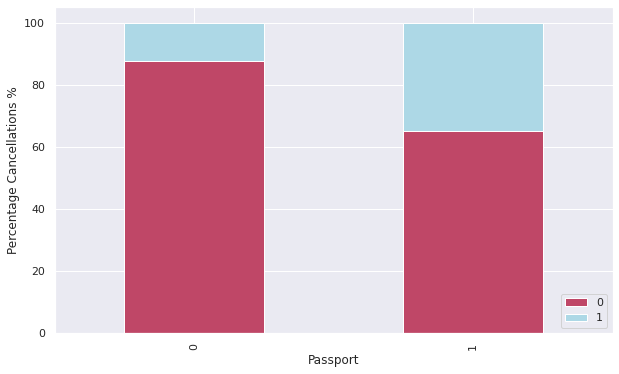

In [ ]:
stacked_barplot(data, "Passport", "ProdTaken" )

- The conversion rate for customers with a passport is higher as compared to the customers without a passport.
- The company should customize more international packages to attract more such customers.


 



**Let's plot the stacked barplot for the variable `Designation` against the target variable `ProdTaken` using the stacked_barplot function.**

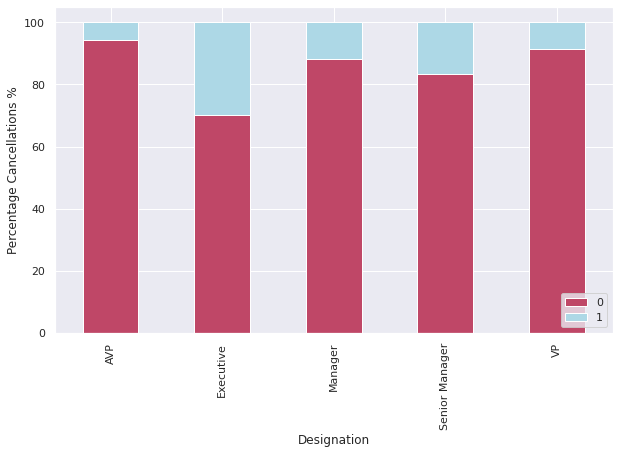

In [ ]:
stacked_barplot(data, "Designation", "ProdTaken" )

- The conversion rate of executives is higher than other designations.
- Customers at VP and AVP positions have the least conversion rate.

## **Data Preparation for Modeling**


**Separating the independent variables (X) and the dependent variable (Y)**

In [ ]:
# Separating target variable and other variables
X=data.drop(columns='ProdTaken')
Y=data['ProdTaken']

 **As we aim to predict customers who are more likely to buy the product, we should drop the columns `DurationOfPitch', 'NumberOfFollowups', 'ProductPitched', 'PitchSatisfactionScore'` as these columns would not be available at the time of prediction for new data.**

In [ ]:
# Dropping columns
X.drop(columns=['DurationOfPitch','NumberOfFollowups','ProductPitched','PitchSatisfactionScore'],inplace=True)

**Splitting the data into a 70% train and 30% test set**

Some classification problems can exhibit a large imbalance in the distribution of the target classes: for instance there could be several times more negative samples than positive samples. In such cases it is recommended to use the stratified sampling technique to ensure that relative class frequencies are approximately preserved in each train and validation fold.

In [ ]:
# Splitting the data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=1,stratify=Y)

**As we saw earlier, our data has missing values. We will impute missing values using median for continuous variables and mode for categorical variables. We will use `SimpleImputer` to do this.**

**The `SimpleImputer` provides basic strategies for imputing missing values. Missing values can be imputed with a provided constant value, or using the statistics (mean, median, or most frequent) of each column in which the missing values are located.**

In [ ]:
si1=SimpleImputer(strategy='median')

median_imputed_col=['Age','MonthlyIncome','NumberOfTrips']

# Fit and transform the train data
X_train[median_imputed_col]=si1.fit_transform(X_train[median_imputed_col])

#Transform the test data i.e. replace missing values with the median calculated using training data
X_test[median_imputed_col]=si1.transform(X_test[median_imputed_col])

In [ ]:
si2=SimpleImputer(strategy='most_frequent')

mode_imputed_col=['TypeofContact','PreferredPropertyStar','NumberOfChildrenVisiting']

# Fit and transform the train data
X_train[mode_imputed_col]=si2.fit_transform(X_train[mode_imputed_col])

# Transform the test data i.e. replace missing values with the mode calculated using training data
X_test[mode_imputed_col]=si2.transform(X_test[mode_imputed_col])

In [ ]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())

Age                         0
TypeofContact               0
CityTier                    0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64
------------------------------
Age                         0
TypeofContact               0
CityTier                    0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64


**Let's create dummy variables for string type variables and convert other column types back to float.**

In [ ]:
#converting data types of columns to float
for column in ['NumberOfPersonVisiting', 'Passport', 'OwnCar']:
    X_train[column]=X_train[column].astype('float')
    X_test[column]=X_test[column].astype('float')

In [ ]:
#List of columns to create a dummy variables
col_dummy=['TypeofContact', 'Occupation', 'Gender', 'MaritalStatus', 'Designation', 'CityTier']

In [ ]:
#Encoding categorical varaibles
X_train=pd.get_dummies(X_train, columns=col_dummy, drop_first=True)
X_test=pd.get_dummies(X_test, columns=col_dummy, drop_first=True)

## **Model evaluation criterion:**

#### **The model can make wrong predictions as:**
1. Predicting a customer will buy the product and the customer doesn't buy - Loss of resources
2. Predicting a customer will not buy the product and the customer buys - Loss of opportunity

#### **Which case is more important?** 
* Predicting that customer will not buy the product but he buys i.e. losing on a potential source of income for the company because that customer will not be targeted by the marketing team when he should be targeted.

#### **How to reduce this loss i.e need to reduce False Negatives?**
* The company wants Recall to be maximized, the greater the Recall lesser the chances of false negatives.

### **Building the model**

We will be building 4 different models:

- **Logistic Regression**
- **Support Vector Machine(SVM)**
- **Decision Tree**
- **Random Forest**

**Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [ ]:
# Creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### **Question 4: Logistic Regression (6 Marks)**

#### **Question 4.1: Build a Logistic Regression model (Use the sklearn library) (1 Mark)**

In [ ]:
# Remove _________ and complete the code

# Fitting logistic regression model
lg = LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression()

#### **Question 4.2: Check the performance of the model on train and test data (2 Marks)**

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2777
           1       0.73      0.25      0.37       644

    accuracy                           0.84      3421
   macro avg       0.79      0.61      0.64      3421
weighted avg       0.83      0.84      0.81      3421



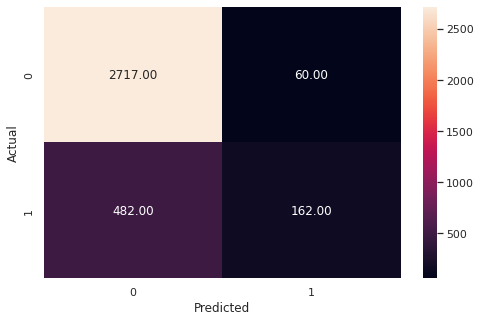

In [ ]:
# Remove _________ and complete the code

# Checking the performance on the training data
y_pred_train = lg.predict(X_train)
metrics_score(y_train, y_pred_train)

**Write your answers here:_____**


#### Let's check the performance on the test set

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1191
           1       0.69      0.23      0.34       276

    accuracy                           0.84      1467
   macro avg       0.77      0.60      0.62      1467
weighted avg       0.82      0.84      0.80      1467



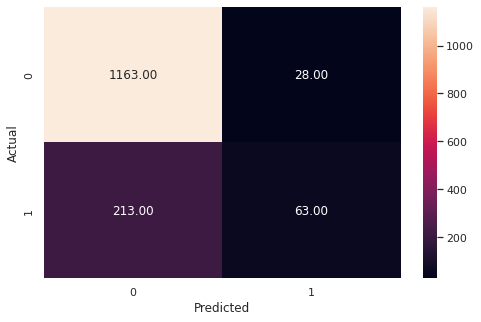

In [ ]:
# Remove _________ and complete the code

# Checking the performance on the test dataset
y_pred_test = lg.predict(X_test)
metrics_score(y_test, y_pred_test)

**Write your answers here:_____**



#### **Question 4.3: Find the optimal threshold for the model using the Precision-Recall Curve. (1 Mark)**

Precision-Recall curve summarizes the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.

Let's use the Precision-Recall curve and see if we can find a **better threshold.**


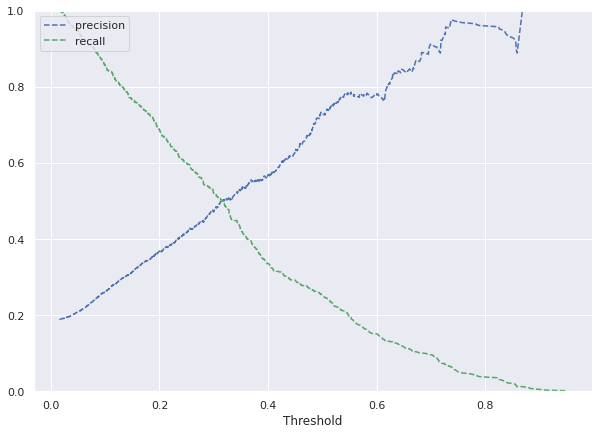

In [ ]:
# Remove _________ and complete the code

# Predict_proba gives the probability of each observation belonging to each class
y_scores_lg=lg.predict_proba(X_train)

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train,y_scores_lg[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

**Write your answers here:_____**


In [ ]:
# Setting the optimal threshold
optimal_threshold = .25

#### **Question 4.4: Check the performance of the model on train and test data using the optimal threshold. (2 Marks)**

              precision    recall  f1-score   support

           0       0.90      0.81      0.85      2777
           1       0.42      0.60      0.49       644

    accuracy                           0.77      3421
   macro avg       0.66      0.70      0.67      3421
weighted avg       0.81      0.77      0.78      3421



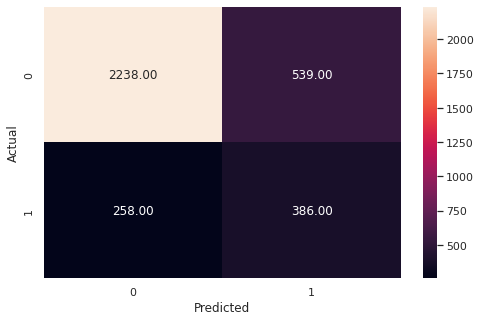

In [ ]:
# Remove _________ and complete the code

# Creating confusion matrix
y_pred_train = lg.predict_proba(X_train)
metrics_score(y_train, y_pred_train[:,1]>optimal_threshold)

**Write your answers here:_____**


#### Let's check the performance on the test set

              precision    recall  f1-score   support

           0       0.91      0.81      0.86      1191
           1       0.45      0.65      0.53       276

    accuracy                           0.78      1467
   macro avg       0.68      0.73      0.70      1467
weighted avg       0.82      0.78      0.80      1467



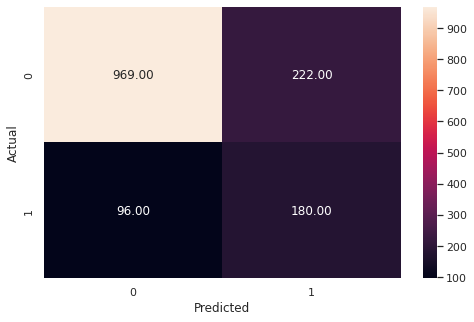

In [ ]:
# Remove _________ and complete the code

y_pred_test = lg.predict_proba(X_test)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold)

**Write your answers here:_____**


### **Question 5: Support Vector Machines (11 Marks)**

To accelerate SVM training, let's scale the data for support vector machines.

In [ ]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train_scaled = scaling.transform(X_train)
X_test_scaled = scaling.transform(X_test)

Let's build the models using the two of the widely used kernel functions:

1.   **Linear Kernel**
2.   **RBF Kernel**



#### **Question 5.1: Build a Support Vector Machine model using a linear kernel (1 Mark)**

In [ ]:
# Remove _________ and complete the code

svm = SVC(kernel='linear',probability=True) # Linear kernal or linear decision boundary
model = svm.fit(X_train_scaled, y_train)

#### **Question 5.2: Check the performance of the model on train and test data (2 Marks)**

              precision    recall  f1-score   support

           0       0.81      1.00      0.90      2777
           1       1.00      0.00      0.00       644

    accuracy                           0.81      3421
   macro avg       0.91      0.50      0.45      3421
weighted avg       0.85      0.81      0.73      3421



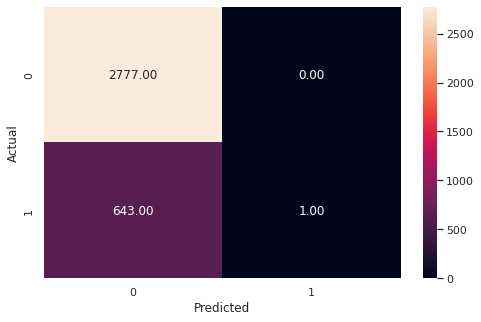

In [ ]:
# Remove _________ and complete the code

y_pred_train_svm = model.predict(X_train_scaled)
metrics_score(y_train, y_pred_train_svm)

**Write your answers here:_____**


#### Checking model performance on test set

              precision    recall  f1-score   support

           0       0.81      1.00      0.90      1191
           1       1.00      0.00      0.01       276

    accuracy                           0.81      1467
   macro avg       0.91      0.50      0.45      1467
weighted avg       0.85      0.81      0.73      1467



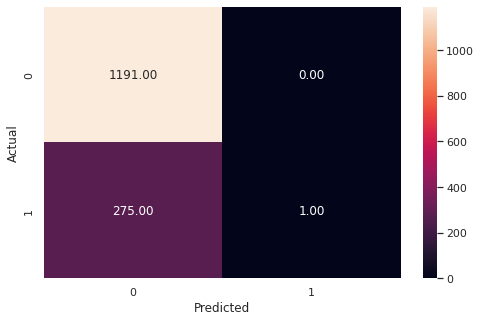

In [ ]:
# Remove _________ and complete the code

y_pred_test_svm = model.predict(X_test_scaled)
metrics_score(y_test, y_pred_test_svm)

**Write your answers here:_____**


#### **Question 5.3: Find the optimal threshold for the model using the Precision-Recall Curve. (1 Mark)**


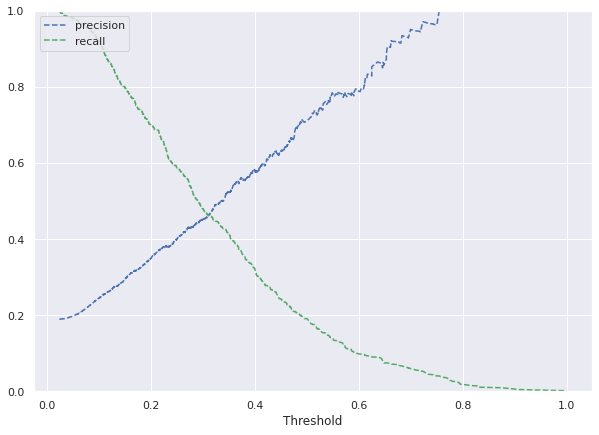

In [ ]:
# Remove _________ and complete the code

# Predict on train data
y_scores_svm=model.predict_proba(X_train_scaled)

precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train,y_scores_svm[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

**Write your answers here:_____**


In [ ]:
optimal_threshold_svm=0.25

#### **Question 5.4: Check the performance of the model on train and test data using the optimal threshold. (2 Marks)**

              precision    recall  f1-score   support

           0       0.89      0.80      0.84      2777
           1       0.40      0.59      0.48       644

    accuracy                           0.76      3421
   macro avg       0.65      0.69      0.66      3421
weighted avg       0.80      0.76      0.77      3421



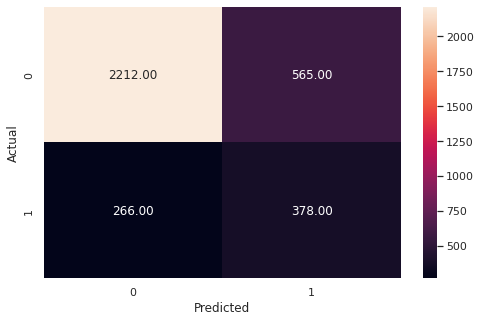

In [ ]:
# Remove _________ and complete the code

y_pred_train_svm = model.predict_proba(X_train_scaled)
metrics_score(y_train, y_pred_train_svm[:,1]>optimal_threshold_svm)

**Write your answers here:_____**


              precision    recall  f1-score   support

           0       0.91      0.80      0.85      1191
           1       0.43      0.64      0.51       276

    accuracy                           0.77      1467
   macro avg       0.67      0.72      0.68      1467
weighted avg       0.82      0.77      0.79      1467



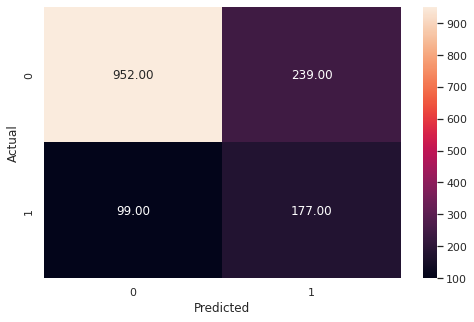

In [ ]:
# Remove _________ and complete the code

y_pred_test = model.predict_proba(X_test_scaled)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold_svm)

**Write your answers here:_____**


#### **Question 5.5: Build a Support Vector Machines model using an RBF kernel (1 Mark)**

In [ ]:
# Remove _________ and complete the code

svm_rbf=SVC(kernel='rbf',probability=True)
model = svm_rbf.fit(X_train_scaled, y_train)

#### **Question 5.6: Check the performance of the model on train and test data (2 Marks)**



              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2777
           1       0.83      0.32      0.46       644

    accuracy                           0.86      3421
   macro avg       0.85      0.65      0.69      3421
weighted avg       0.86      0.86      0.83      3421



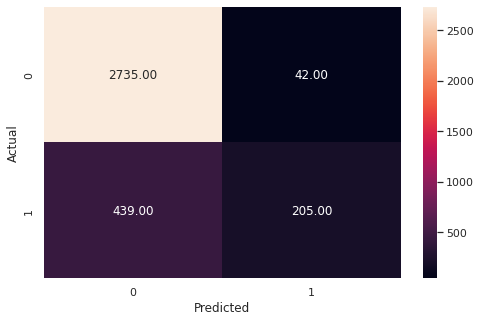

In [ ]:
# Remove _________ and complete the code

y_pred_train_svm = model.predict(X_train_scaled)
metrics_score(y_train, y_pred_train_svm)

**Write your answers here:_____**


#### Checking model performance on test set

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1191
           1       0.79      0.26      0.39       276

    accuracy                           0.85      1467
   macro avg       0.82      0.62      0.65      1467
weighted avg       0.84      0.85      0.81      1467



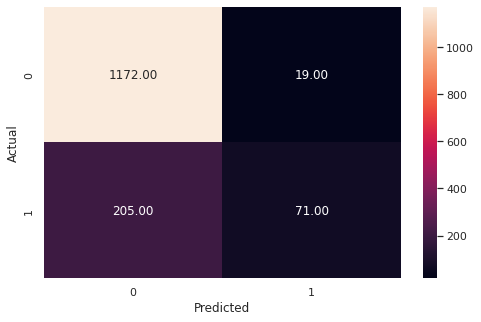

In [ ]:
# Remove _________ and complete the code

y_pred_test = model.predict(X_test_scaled)

metrics_score(y_test, y_pred_test)

**Write your answers here:_____**


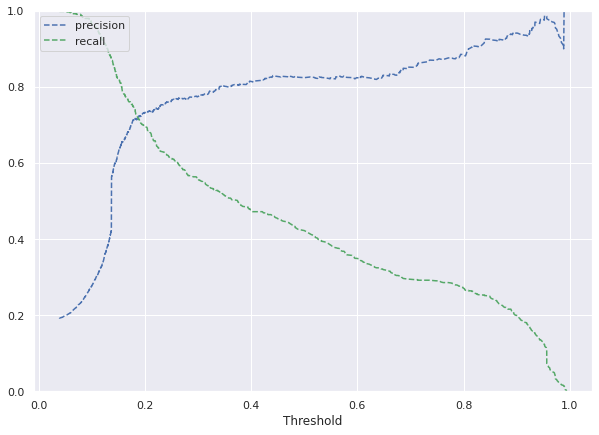

In [ ]:
# Predict on train data
y_scores_svm=model.predict_proba(X_train_scaled)

precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [ ]:
optimal_threshold_svm=0.17

#### **Question 5.7: Check the performance of the model on train and test data using the optimal threshold. (2 Marks)**

#### Checking model performance on training set

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2777
           1       0.69      0.76      0.72       644

    accuracy                           0.89      3421
   macro avg       0.81      0.84      0.83      3421
weighted avg       0.89      0.89      0.89      3421



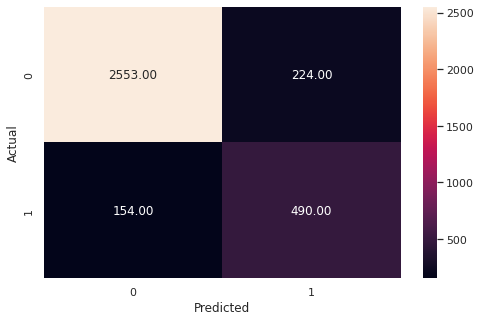

In [ ]:
# Remove _________ and complete the code

y_pred_train_svm = model.predict_proba(X_train_scaled)
metrics_score(y_train, y_pred_train_svm[:,1]>optimal_threshold_svm)

**Write your answers here:_____**


#### Checking model performance on test set

              precision    recall  f1-score   support

           0       0.92      0.87      0.90      1191
           1       0.56      0.69      0.62       276

    accuracy                           0.84      1467
   macro avg       0.74      0.78      0.76      1467
weighted avg       0.86      0.84      0.85      1467



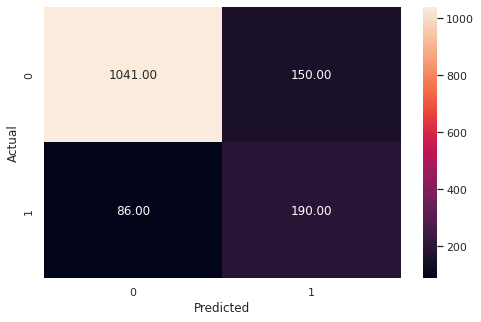

In [ ]:
# Remove _________ and complete the code

y_pred_test = model.predict_proba(X_test_scaled)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold_svm)

**Write your answers here:_____**


### **Question 6: Decision Trees (7 Marks)**

#### **Question 6.1: Build a Decision Tree Model (1 Mark)**

In [ ]:
# Remove _________ and complete the code

model_dt = DecisionTreeClassifier(random_state=1)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### **Question 6.2: Check the performance of the model on train and test data (2 Marks)**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2777
           1       1.00      1.00      1.00       644

    accuracy                           1.00      3421
   macro avg       1.00      1.00      1.00      3421
weighted avg       1.00      1.00      1.00      3421



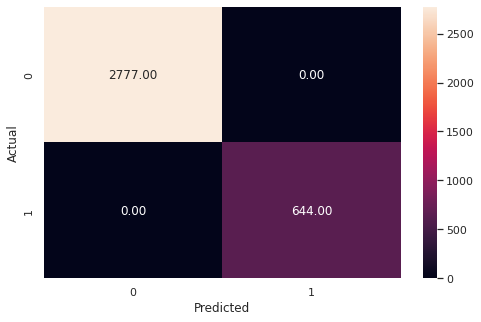

In [ ]:
# Remove _________ and complete the code

# Checking performance on the training dataset
pred_train_dt = model_dt.predict(X_train)
metrics_score(y_train, pred_train_dt)

**Write your answers here:_____**


#### Checking model performance on test set

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1191
           1       0.66      0.68      0.67       276

    accuracy                           0.88      1467
   macro avg       0.79      0.80      0.80      1467
weighted avg       0.88      0.88      0.88      1467



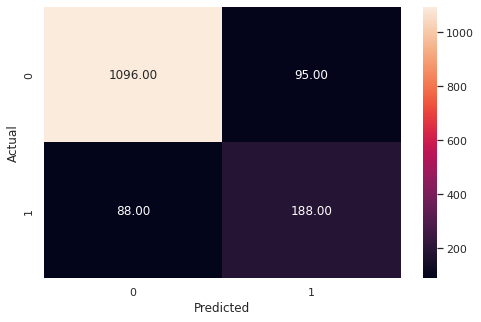

In [ ]:
pred_test_dt = model_dt.predict(X_test)
metrics_score(y_test, pred_test_dt)

**Write your answers here:_____**


 #### **Question 6.3: Perform hyperparameter tuning for the decision tree model using GridSearch CV (1 Mark)**

In [ ]:
# Remove _________ and complete the code

# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}


# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv=5,scoring='recall',n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=50, min_samples_split=10,
                       random_state=1)

#### **Question 6.4: Check the performance of the model on the train and test data using the tuned model (2 Mark)**

#### Checking performance on the training set 

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      2777
           1       0.54      0.34      0.42       644

    accuracy                           0.82      3421
   macro avg       0.70      0.64      0.66      3421
weighted avg       0.80      0.82      0.80      3421



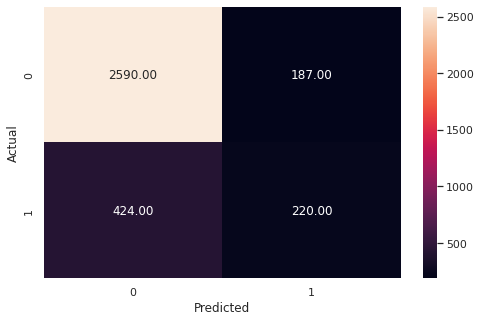

In [ ]:
# Remove _________ and complete the code

# Checking performance on the training dataset
dt_tuned = estimator.predict(X_train)
metrics_score(y_train,dt_tuned)

**Write your answers here:_____**


              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1191
           1       0.63      0.37      0.47       276

    accuracy                           0.84      1467
   macro avg       0.75      0.66      0.69      1467
weighted avg       0.82      0.84      0.82      1467



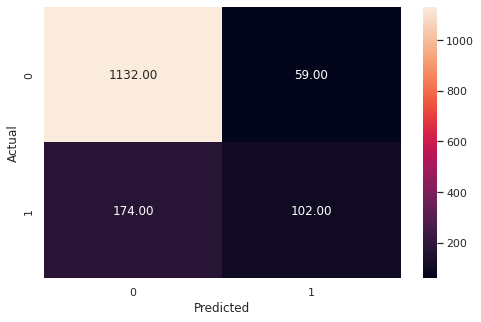

In [ ]:
# Remove _________ and complete the code

# Checking performance on the training dataset
y_pred_tuned = estimator.predict(X_test)
metrics_score(y_test,y_pred_tuned)

**Write your answers here:_____**


#### **Visualizing the Decision Tree**

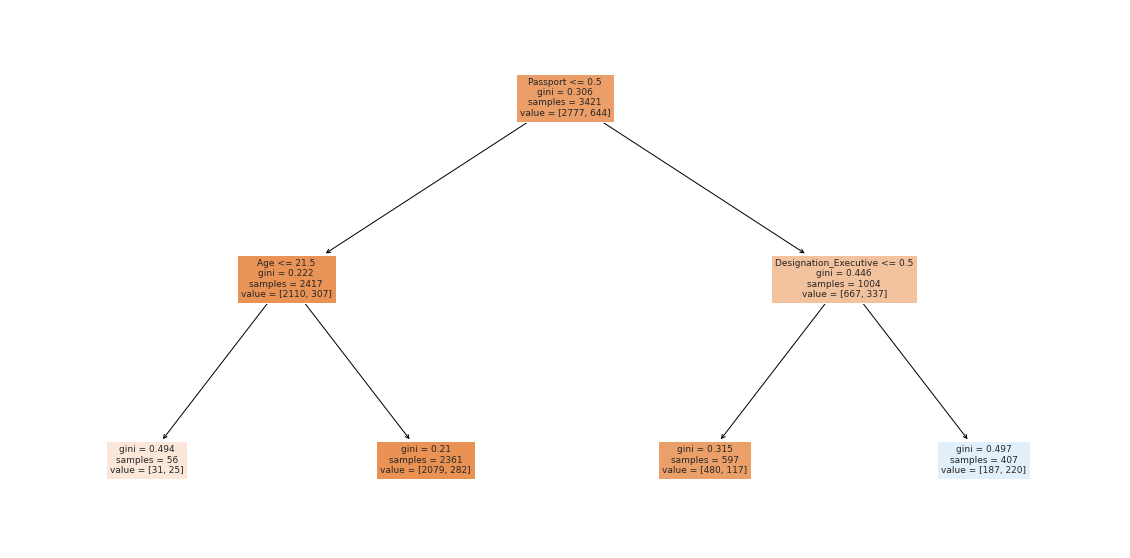

In [ ]:
feature_names = list(X_train.columns)
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    max_depth=4,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

#### **Question 6.5: What are some important features based on the tuned decision tree? (1 Mark)**

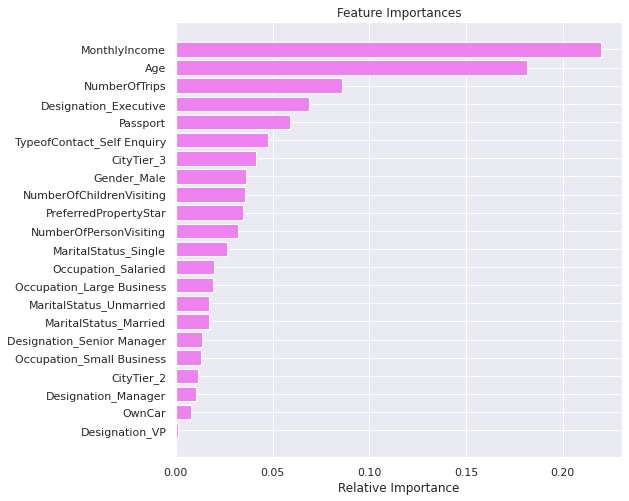

In [ ]:
# Remove _________ and complete the code

# Importance of features in the tree building
importances = model_dt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Write your answers here:_____**


### **Question 7: Random Forest (4 Marks)**

#### **Question 7.1: Build a Random Forest Model (1 Mark)**

In [ ]:
# Remove _________ and complete the code

rf_estimator = RandomForestClassifier( random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

#### **Question 7.2: Check the performance of the model on the train and test data (2 Marks)**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2777
           1       1.00      1.00      1.00       644

    accuracy                           1.00      3421
   macro avg       1.00      1.00      1.00      3421
weighted avg       1.00      1.00      1.00      3421



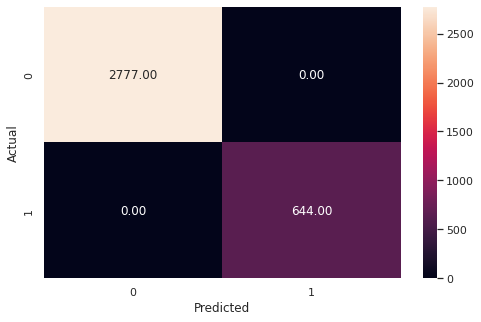

In [ ]:
# Remove _________ and complete the code

y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

**Write your answers here:_____**


              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1191
           1       0.91      0.47      0.62       276

    accuracy                           0.89      1467
   macro avg       0.90      0.73      0.78      1467
weighted avg       0.89      0.89      0.88      1467



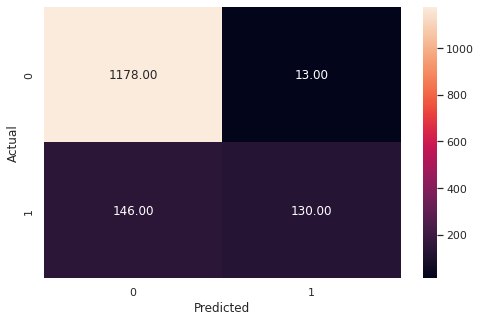

In [ ]:
# Remove _________ and complete the code

y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

**Write your answers here:_____**


#### **Question 7.3: What are some important features based on the Random Forest? (1 Mark)**

Let's check the feature importance of the Random Forest

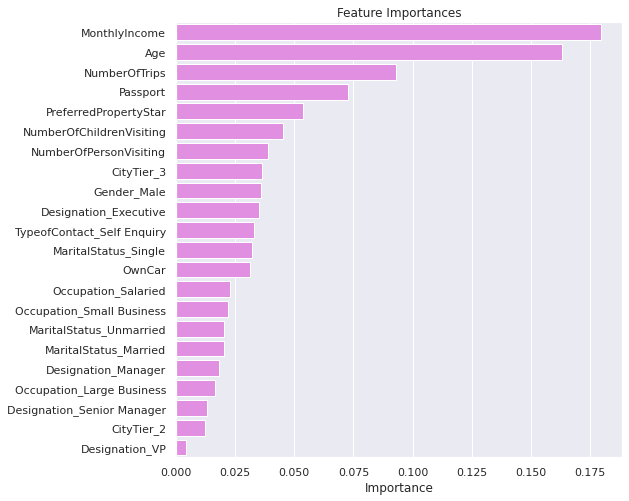

In [ ]:
# Remove _________ and complete the code

importances = rf_estimator.feature_importances_

columns = X_train.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
sns.barplot(importance_df.Importance, importance_df.index,color="violet")

**Write your answers here:_____**


### **Question 8: Conclude ANY FOUR key takeaways for business recommendations (4 Marks)**

**Write your answers here:_____**


## **Happy Learning!**